# Setup

In [ ]:
using Pkg
using Unitful
using AxisArrays
Pkg.activate("..")
using TOML
using RCal
const src = joinpath("..","src")
include(joinpath(src,"count_lengths.jl"))

In [2]:
R"options(rcalljl_options=list(width=800,height=400))"

RObject{VecSxp}
$rcalljl_options
$rcalljl_options$height
[1] 360

$rcalljl_options$width
[1] 432




# Freq-level

In [207]:
paramfile = joinpath("..","data","count_lengths","run_2018-09-12",
                     "individual_extremes_params.feather")
params = getparams(paramfile) do i,row
  abs(row[:f_c_m] - 100) < 1 &&
  abs(row[:f_c_a] - 5) < 1 &&
  row[:Δf] == 12
end

settings = TOML.parsefile(joinpath(src,"settings.toml"))
settings["nmf"]["ncomponents"] = 2
settings["track"]["analyze"]["max_sources"] = 2
settings["track"]["analyze"]["freq_ridge"] = 2
settings["track"]["analyze"]["scale_ridge"] = 1e-6
settings["track"]["analyze"]["ridge_threshold"] = 0.05
settings["track"]["analyze"]["normalize"] = true
settings["track"]["analyze"]["min_norm"] = 0.05
settings["percept_lengths"]["window_ms"] = 400
settings["percept_lengths"]["bandwidth_threhsold"] = 0.25

0.25

In [276]:
settings["rates"]["rates_Hz"] = [0.1,0.25,0.5,1,2,8]
result = []
for d in [0.5,3,6,12]
 @show d
 params[:Δf] = d
  push!(result,bistable_model(10,params,settings,intermediate_results=true))
end

d = 0.5
d = 3.0
d = 6.0
d = 12.0


# $\Delta f$ = 0.5st

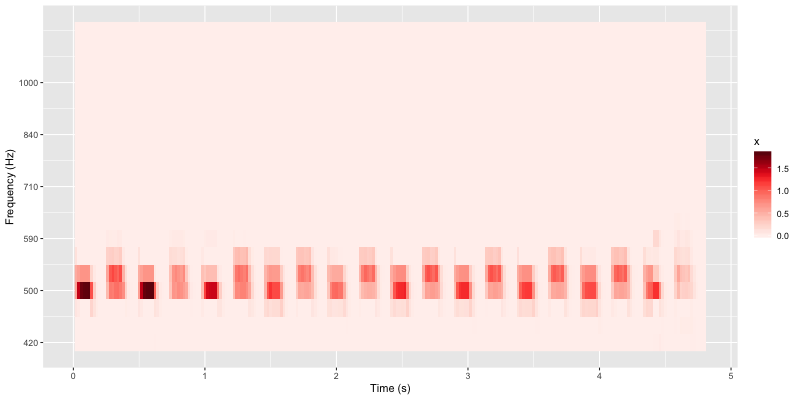

RObject{VecSxp}


In [259]:
rplot(result[1].primary_source)

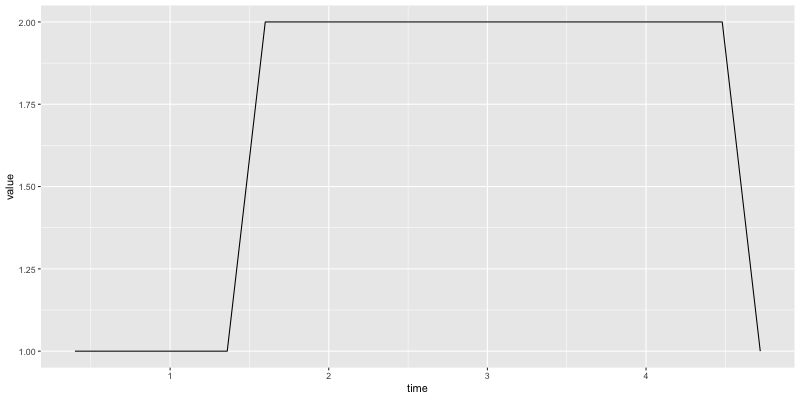

RObject{VecSxp}


In [260]:
rplot(result[1].percepts.bratio)

# $\Delta f$ = 3st

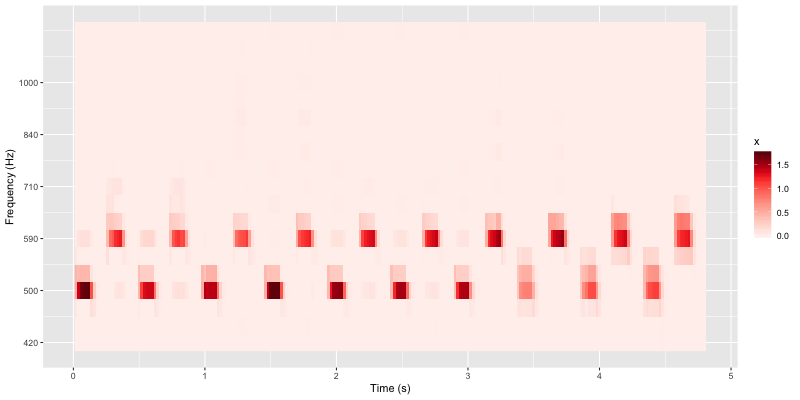

RObject{VecSxp}


In [261]:
rplot(result[2].primary_source)

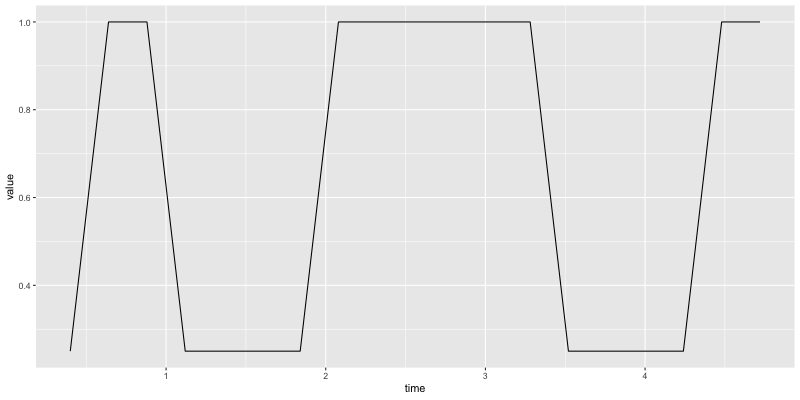

RObject{VecSxp}


In [262]:
rplot(result[2].percepts.bratio)

# $\Delta f$ = 6st

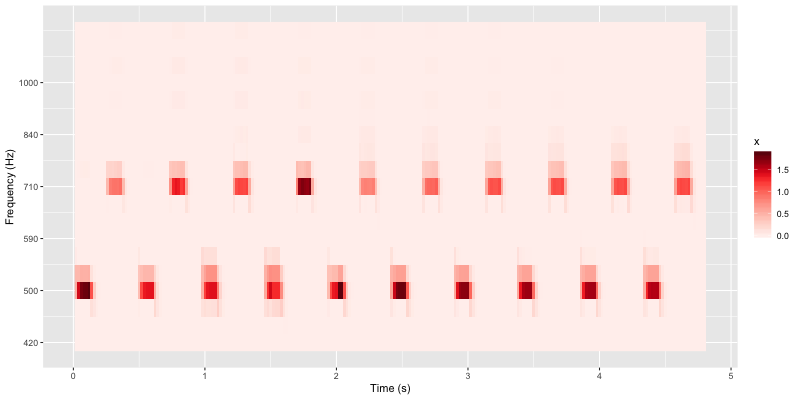

RObject{VecSxp}


In [268]:
rplot(result[3].primary_source)

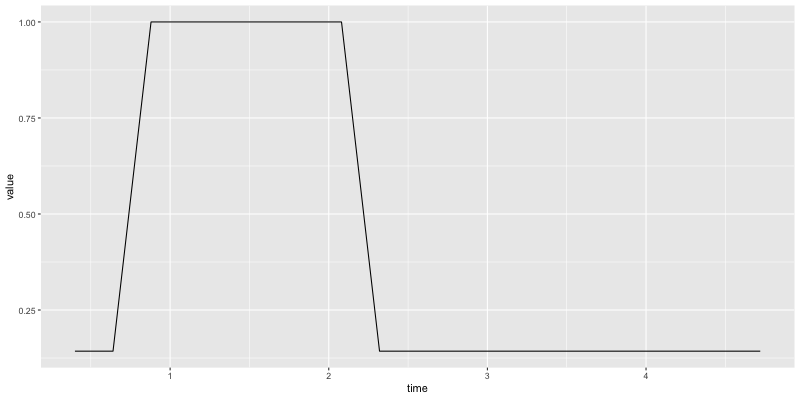

RObject{VecSxp}


In [269]:
rplot(result[3].percepts.bratio)

# $\Delta f$ = 12st

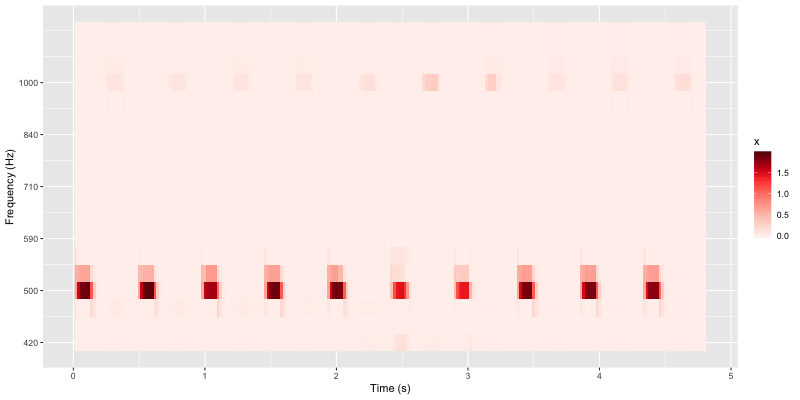

RObject{VecSxp}


In [274]:
rplot(result[4].primary_source)

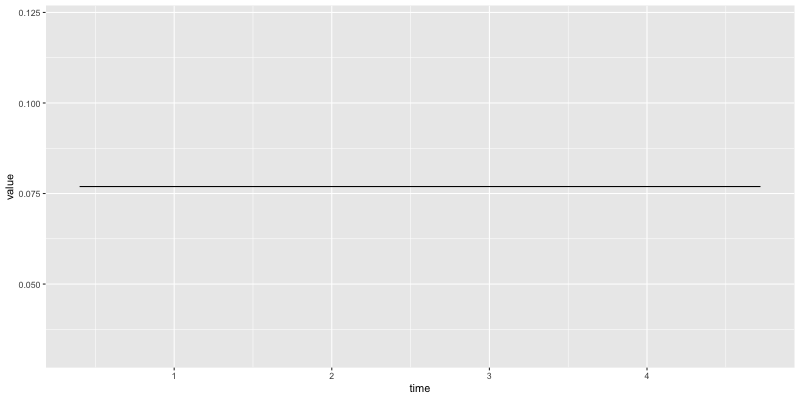

RObject{VecSxp}


In [275]:
rplot(result[4].percepts.bratio)